# Malaria Diagnosis


Naturally diagnosing diseases requires effort, time, and people specialized in the field, and the possibility of human error in diagnosis is very high. Therefore, the need for an automated system for diagnosis has increased. In recent years, a lot of research has been produced where it combines artificial intelligence and machine learning with the medical field. One of the most dangerous diseases world around is Malaria, which could infect humans with parasites that are transmitted through the bites of infected female Anopheles mosquitoes. where the estimated deaths in 2019 reached about 409000 cases . Based on the purpose of early diagnosing of malaria this project will propose building a model using deep learning methods such as the convolution neural network (CNN) to classify the cells into, infected with malaria or unaffected. This project produces important information for those who are interested in diagnosing malaria using deep learning methods and for the medical community in general.

# The Dataset

The used dataset is microscopic cells images (27,558 cell images), labelled to parasitized(abnormal) and uninfected cells(normal), this dataset was collected by developing a mobile application that runs on a standard Android smartphone attached to a conventional light microscope. Figure 1 below shows a sample of the dataset. The dataset is a balanced dataset where the number of image samples of the parasitized class is the same as the number of uninfected class which equal 13779 images.

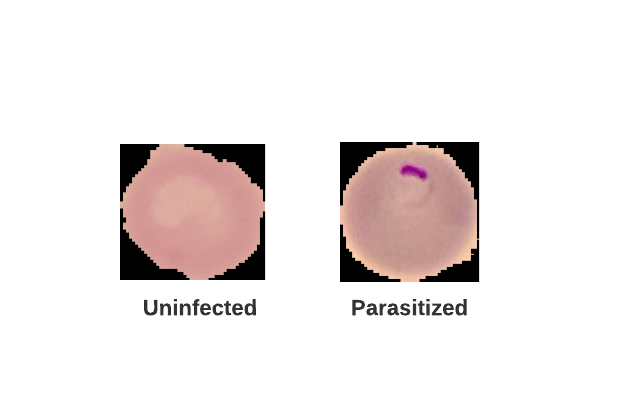

# The Design:

This project will aim to diagnose malaria based on detecting the parasitized cells using the deep learning method (CNN). Figure2 below provide an overview of the main methodology used in this project where the first step is preprocessing the dataset by resizing the images to fit the model, after that dividing the dataset into a training set to train the model, validation set, and testing set to evaluate the model.

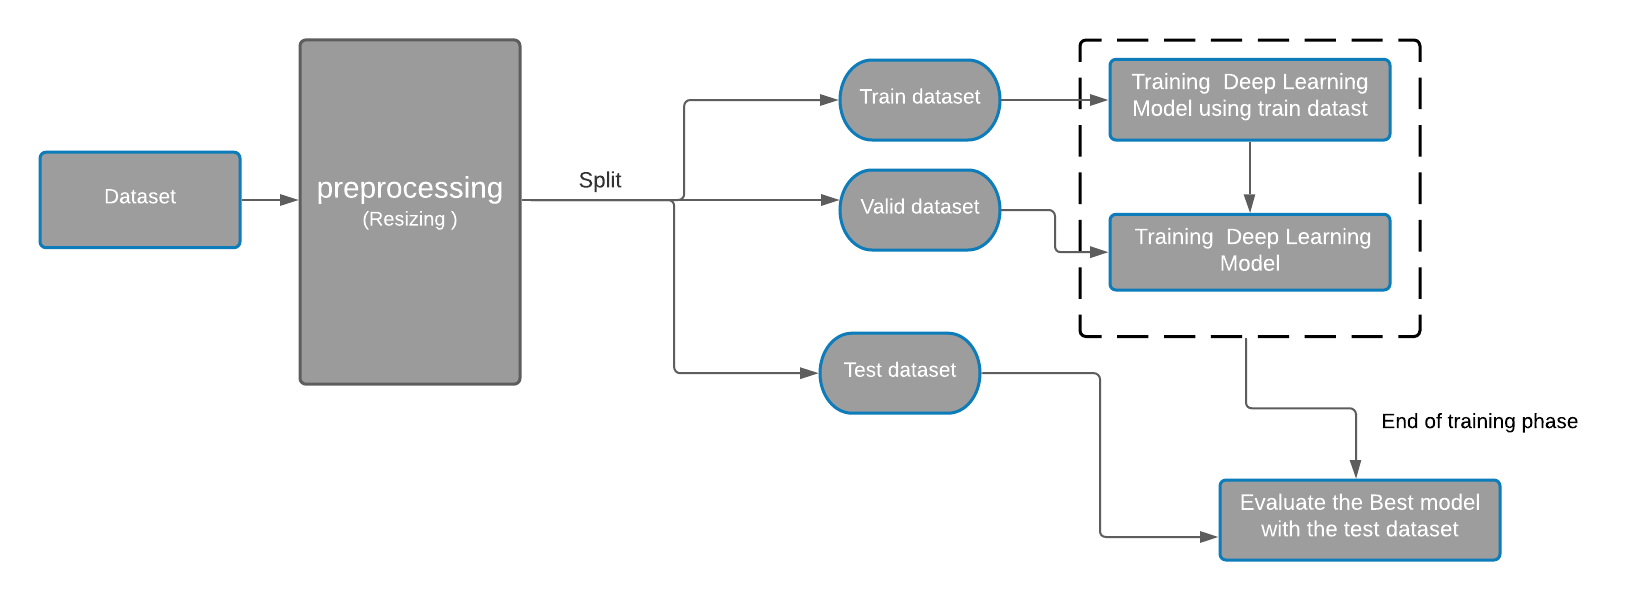

# The Model:

The used model is a convolutional neural network (CNN) using a transfer learning strategy, where the CNN model is pre-trained in bigger dataset such as (ImageNet) and used the learned weights to implement the classification in another dataset, in this case, the malaria dataset. Based on the fact the dataset is balanced so, the performance evaluation will be calculated by the accuracy.

# Tools:

•**Preprocessing:**
OpenCV, TensorFlow, keras , sklearn, PIL, numpy 

•**The model:** 
keras.applications

•**Visualization:**
matplotlib


# 1-Import Packages

In [12]:
import tensorflow as tf

In [13]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [14]:

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential,Model
from keras.layers import Activation
from keras.layers.core import Dense,Flatten,Dropout
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam

In [12]:
tf.config.list_physical_devices('GPU')


[]

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.xception import Xception

# 2- Dataset

In [18]:
base_path ='cell_images.'
print(os.listdir(base_path))
print(f'Total Parasitized images {len(os.listdir(os.path.join(base_path, "Parasitized")))}')
print(f'Total Uninfected images {len(os.listdir(os.path.join(base_path, "Uninfected")))}')

['Parasitized', 'Uninfected']
Total Parasitized images 13780
Total Uninfected images 13780


From the pie chart below we can see that the dataset not suffering from the imbalance problem.

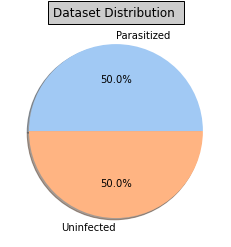

In [19]:
#p= [len(os.listdir(os.path.join(base_path, "Parasitized"))), len(os.listdir(os.path.join(base_path, "Uninfected")))]
colors = sns.color_palette('pastel')[0:3]
# Creating dataset
labe1 = ['Parasitized', 'Uninfected']
 
p= [len(os.listdir(os.path.join(base_path, "Parasitized"))), len(os.listdir(os.path.join(base_path, "Uninfected")))]
 
# Creating plot
fig = plt.figure(figsize =(7, 4))
plt.pie(p, labels = labe1,autopct='%1.1f%%', shadow=True, colors=colors)
plt.title("Dataset Distribution ", bbox={'facecolor':'0.8', 'pad':5})
# show plot
plt.show()

# 3- splitting the dataset into three parts with ratio of (75%,15%,10%)

* Training data(75%)

* Validation data (15%)

* Testing data(10%)

In [20]:
!pip install split-folders
import splitfolders

In [21]:
# splitting the data into train, validation and test set


if not os.path.exists('images22'):
 os.mkdir('images22')

# Using the splitfolders library to split the data and store it into images22 file

In [22]:
#os.mkdir('images22')  # directory to store the Training, Validation and Testing datasets
input_folder = base_path
output_folder = 'images22'
splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.75, 0.15,0.10), group_prefix=None) # default values

In [23]:
# checking the newly created directory structure
input_path = 'images22'
for folder in os.listdir(input_path):
    print(folder)
    print(os.listdir(os.path.join(input_path, folder)))

test
['Parasitized', 'Uninfected']
train
['Parasitized', 'Uninfected']
val
['Parasitized', 'Uninfected']


In [24]:
train_dir = os.path.join(input_path, 'train')
test_dir = os.path.join(input_path, 'test')
val_dir = os.path.join(input_path, 'val')

In [25]:

train_Parasitized_dir = os.path.join(train_dir, 'Parasitized')
train_Uninfected_dir = os.path.join(train_dir, 'Uninfected')

validation_Parasitized_dir = os.path.join(val_dir, 'Parasitized')
validation_Uninfected_dir = os.path.join(val_dir, 'Uninfected')

test_Parasitized_dir = os.path.join(test_dir, 'Parasitized')
test_Uninfected_dir = os.path.join(test_dir, 'Uninfected')


In [26]:
# total number of train and validation images
training_img_count = len(os.listdir(train_Parasitized_dir) ) + len(os.listdir(train_Uninfected_dir) )     
validation_img_count = len(os.listdir(validation_Parasitized_dir) ) + len(os.listdir(validation_Uninfected_dir) )
Test_img_count = len(os.listdir(test_Parasitized_dir) ) + len(os.listdir(test_Uninfected_dir) )
print(f'total training images: {training_img_count}')
print(f'total validation images: {validation_img_count}')
print(f'total test images: {Test_img_count}') 

total training images: 20670
total validation images: 4134
total test images: 2756


# The pie chart below represents the dataset splitting .

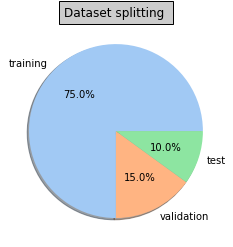

In [27]:
p1=[training_img_count,validation_img_count ,Test_img_count]
# Creating plot
labe2 = ['training', 'validation','test']
fig = plt.figure(figsize =(7, 4))
plt.pie(p1, labels = labe2,autopct='%1.1f%%', shadow=True, colors=colors)
plt.title("Dataset splitting ", bbox={'facecolor':'0.8', 'pad':5}) 
# show plot
plt.show()

# 4-  Training dataset sample  

Text(0.5, 1.0, 'Uninfected')

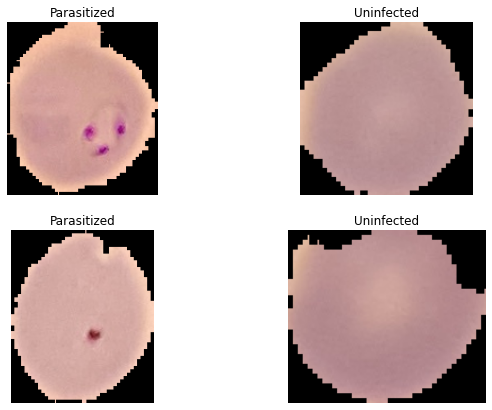

In [28]:
 rows = 2
columns = 2 
fig = plt.figure(figsize=(10, 7))
# reading images
Image1 = plt.imread('images22/train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')
Image2 = plt.imread('images22/train/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png')
Image3 = plt.imread('images22/train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png')
Image4 = plt.imread('images22/train/Uninfected/C1_thinF_IMG_20150604_104722_cell_15.png')
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Parasitized")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Uninfected")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Parasitized")
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Uninfected")


In [29]:
print('total training Parasitized images :', len(os.listdir(train_Parasitized_dir) ))
print('total training Uninfected images :', len(os.listdir(train_Uninfected_dir) ))

print('total validation Parasitized images :', len(os.listdir(validation_Parasitized_dir) ))
print('total validation Uninfected images :', len(os.listdir(validation_Uninfected_dir) ))

print('total test Parasitized images :', len(os.listdir(test_Parasitized_dir) ))
print('total test Uninfected images :', len(os.listdir(test_Uninfected_dir) ))

total training Parasitized images : 10335
total training Uninfected images : 10335
total validation Parasitized images : 2067
total validation Uninfected images : 2067
total test Parasitized images : 1378
total test Uninfected images : 1378


In [30]:
Parasitized=[len(os.listdir(train_Parasitized_dir)),len(os.listdir(validation_Parasitized_dir) ),len(os.listdir(test_Parasitized_dir))]
Uninfected=[len(os.listdir(train_Uninfected_dir)),len(os.listdir(validation_Uninfected_dir) ),len(os.listdir(test_Uninfected_dir))]

Parasitized
type(Uninfected)


list

# Creating a dataframe to illustrate the dataset in (training ,validation ,testing ) sets.

In [31]:
# Import pandas library
import pandas as pd
  
# initialize list of lists
data = [['Train', Parasitized[0],Uninfected[0]], ['Validation', Parasitized[1],Uninfected[1]], ['Test', Parasitized[2],Uninfected[2]]]
data

[['Train', 10335, 10335], ['Validation', 2067, 2067], ['Test', 1378, 1378]]

In [32]:
       
# Create the pandas DataFrame
df= pd.DataFrame(data, columns = ['sets','Parasitized', 'Uninfected'])
  
# print dataframe.
df


,sets,Parasitized,Uninfected
0,Train,10335,10335
1,Validation,2067,2067
2,Test,1378,1378


# Plotting the dataframe.

<AxesSubplot:xlabel='sets'>

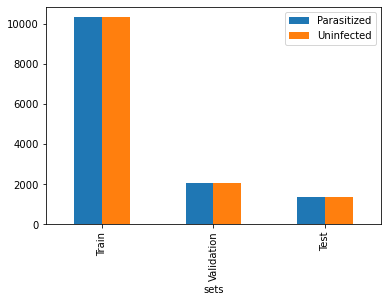

In [33]:
fig, ax = plt.subplots()
df.plot.bar(x='sets', ax=ax)

# Defining the hyperparameters

Based on fact that all the images have random sizes, we should resize all images to a uniform size(224,224) to fit the CNN models.

In [34]:
image_shape = [224, 224]
batch_size = 64
epochs = 5

# 5- preprocessing and data augmentation :

using ImageDataGenerator to apply the pre-processing to the dataset and apply data augmentation by making changes to the original data images such as (rotation, flipping ..etc) to the training and validation dataset and apply rescaling to all data parts. the rescaling can improve the performance of the model .

In [35]:

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (image_shape[0], image_shape[1]),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary',
                                                    shuffle = True
                                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                  target_size = (image_shape[0], image_shape[1]),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                  shuffle = True
                                                 )

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (image_shape[0], image_shape[1]),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                  shuffle = True)

Found 20668 images belonging to 2 classes.
Found 4134 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


In [36]:
from tensorflow.keras import layers 
from tensorflow.keras import Model 

# 6- Building the model

the used model is MobileNet  by  Google is a deep convolutional neural network that consists of is 53 layers. This pre-trained model was constructed to classify images into 1000 object categories

Transfer learning is the method of using the knowledge earned from a previous trained AI model to another instead of gathering thousands of images for the  process of model training the from scratch.
the implementation of the model is done as follow:
* first: import the pre-trained model and remove the last layer .Then a flatten layer is added. Followed by Dense layer 64 with 'relu' as avtivation function . and add a dropout with rate of (0.5). The last layer is the classification layer,  where 'sigmoid' function is applied for classification.
* second: compile the model with defining the optimizer method (using SGD), and the loss function(binary_crossentropy), and selecting the accuracy as performance metrics.
* third: fit the model with training and validation data with epochs=5.

In [7]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

9420800/9406464 [==============================] - 55s 6us/step


In [37]:
for layer in base_model.layers:
    layer.trainable = False

In [38]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 64 hidden units and ReLU activation
x = layers.Dense(64, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.models.Model(base_model.input, x)


In [39]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9), loss = 'binary_crossentropy',metrics = ['acc'])

In [40]:




vgghist = model.fit(train_generator, validation_data = validation_generator, epochs = 5)


Epoch 1/5
323/323 [==============================] - 1015s 3s/step - loss: 0.3064 - acc: 0.8757 - val_loss: 0.3028 - val_acc: 0.8737
Epoch 2/5
323/323 [==============================] - 926s 3s/step - loss: 0.2310 - acc: 0.9158 - val_loss: 0.2126 - val_acc: 0.9204
Epoch 3/5
323/323 [==============================] - 930s 3s/step - loss: 0.2059 - acc: 0.9243 - val_loss: 0.2328 - val_acc: 0.9076
Epoch 4/5
323/323 [==============================] - 928s 3s/step - loss: 0.2017 - acc: 0.9277 - val_loss: 0.2283 - val_acc: 0.9086
Epoch 5/5
323/323 [==============================] - 934s 3s/step - loss: 0.1891 - acc: 0.9325 - val_loss: 0.2600 - val_acc: 0.8940


In [42]:
CLASS_NAMES = list(os.listdir(base_path))

In [43]:
#Classes Names
#CLASS_NAMES = list(train_generator.class_indices.keys())
CLASS_NAMES

['Parasitized', 'Uninfected']